In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le fichier
fichier = "../Clean_data/Pays_all.xlsx"
pays_df = pd.read_excel(fichier)
pd.set_option('display.max_columns', None)  # Pour voir toutes les colonnes
pd.set_option('display.width', 1000)        # Pour éviter les retours à la ligne
pd.set_option('display.precision', 4)       # Pour les nombres décimaux

# Nettoyage
pays_df = pays_df[pays_df['Source'] != 'Global']
# Renommer la colonne pour simplifier
print(pays_df.head(10))

                  Pays  Clics  Impressions     CTR  Position            Source
0           États-Unis   7900       821702  0.0096     14.13  manufacturer URL
1               Canada    233         7882  0.0296     16.27  manufacturer URL
2          Philippines    205        13445  0.0152      8.12  manufacturer URL
3  Émirats Arabes Unis     59         1001  0.0589      6.73  manufacturer URL
4          Royaume-Uni     52        10651  0.0049     27.97  manufacturer URL
5      Arabie Saoudite     51          792  0.0644     10.60  manufacturer URL
6            Australie     48         1229  0.0391     15.39  manufacturer URL
7           Porto Rico     48          333  0.1441      6.16  manufacturer URL
8             Pays-Bas     46         1508  0.0305     13.50  manufacturer URL
9             Bulgarie     45          716  0.0628     11.35  manufacturer URL


C:\Users\HP\AppData\Local\Temp\ipykernel_21144\2774379969.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_clics_df, x="Pays", y="Clics", palette="Blues_d")


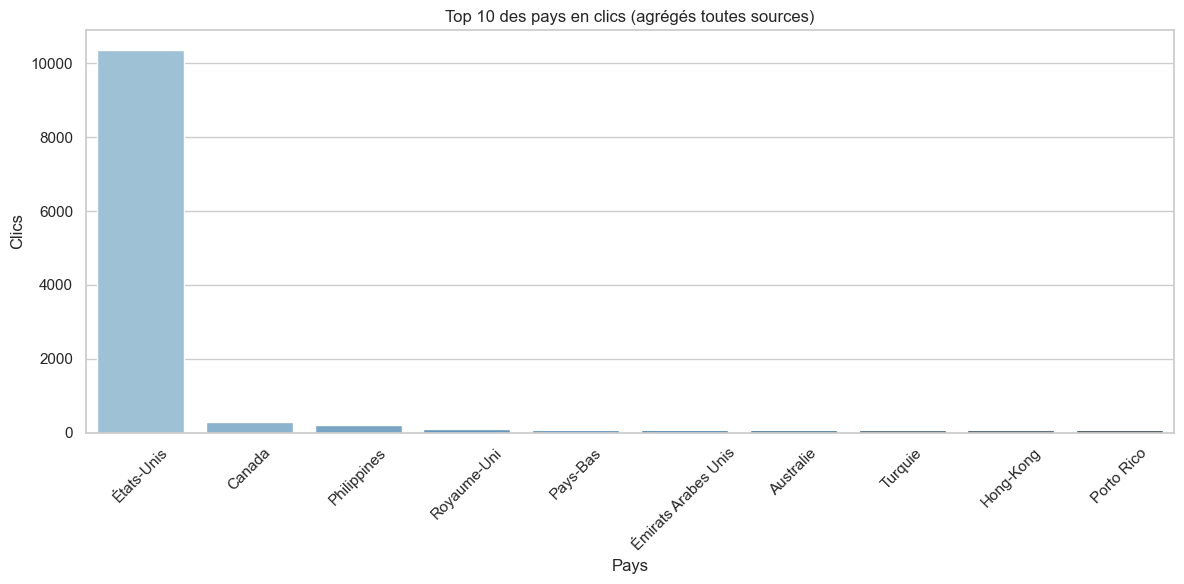

C:\Users\HP\AppData\Local\Temp\ipykernel_21144\2774379969.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_pays, x="Pays", y="CTR", palette="Greens")


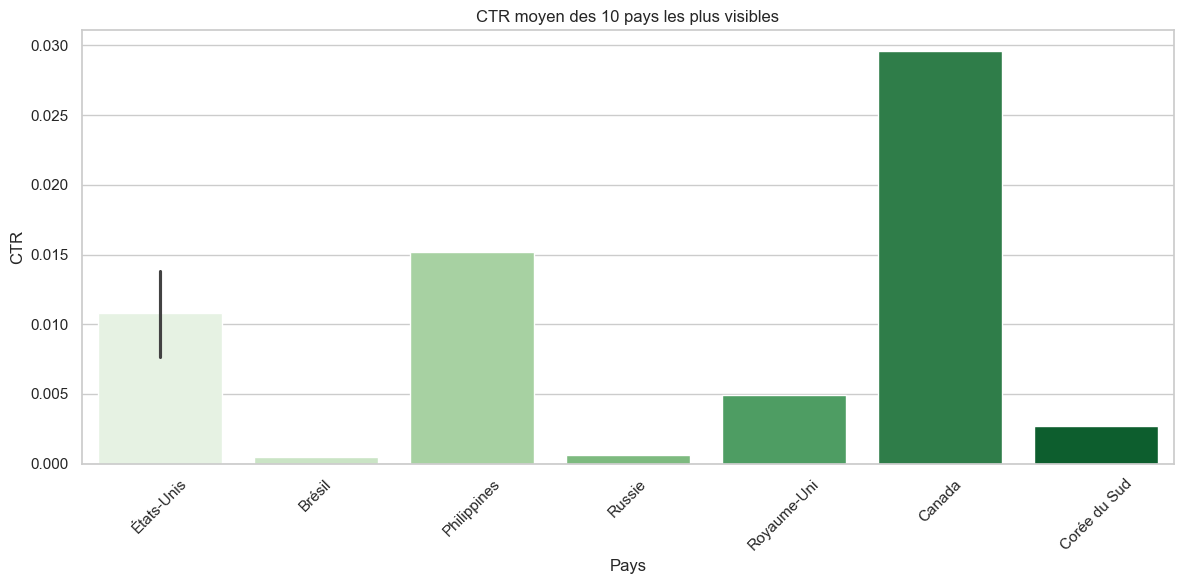

C:\Users\HP\AppData\Local\Temp\ipykernel_21144\2774379969.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_pays_clics, x="Pays", y="Position", palette="Oranges_d")


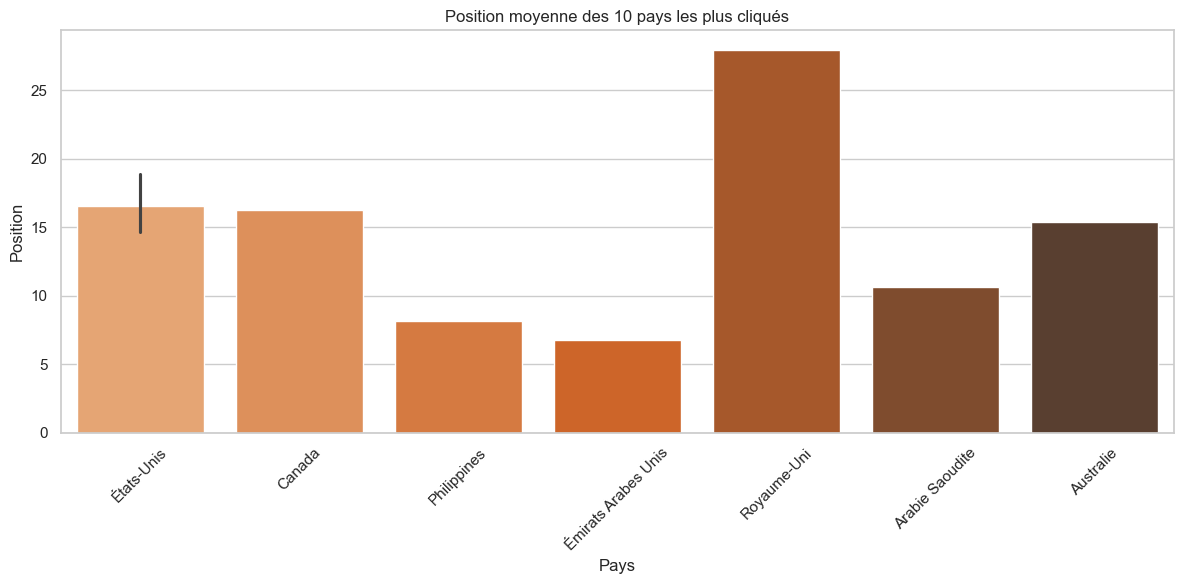

In [12]:
top_clics_df = (
    pays_df.groupby("Pays", as_index=False)["Clics"].sum()
    .sort_values("Clics", ascending=False)
    .head(10)
)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_clics_df, x="Pays", y="Clics", palette="Blues_d")
plt.title("Top 10 des pays en clics (agrégés toutes sources)")
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("../Assets/top10_clics_pays.png")
plt.show()
# 2. CTR moyen par pays (top 10 par volume d'impression)
top_pays = pays_df.sort_values("Impressions", ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_pays, x="Pays", y="CTR", palette="Greens")
plt.title("CTR moyen des 10 pays les plus visibles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Position moyenne par pays (top 10 en clics)
top_pays_clics = pays_df.sort_values("Clics", ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_pays_clics, x="Pays", y="Position", palette="Oranges_d")
plt.title("Position moyenne des 10 pays les plus cliqués")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

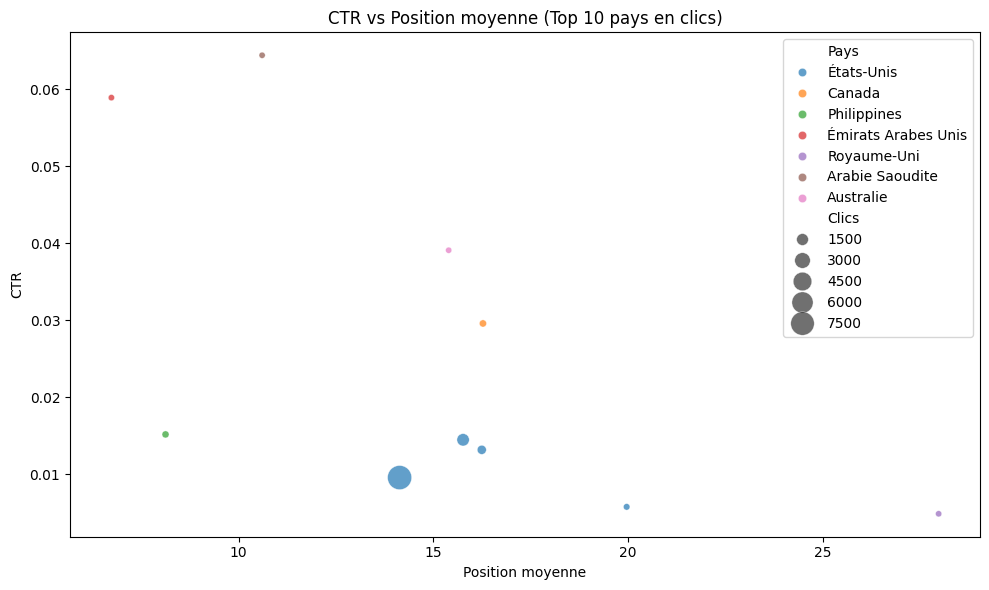

In [5]:
# 4. Scatter CTR vs Position par pays (Top 10 en clics pour lisibilité)
top_pays_scatter = pays_df.sort_values("Clics", ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_pays_scatter, x="Position", y="CTR", size="Clics", hue="Pays", alpha=0.7, sizes=(20, 300))
plt.title("CTR vs Position moyenne (Top 10 pays en clics)")
plt.xlabel("Position moyenne")
plt.ylabel("CTR")
plt.tight_layout()
plt.show()

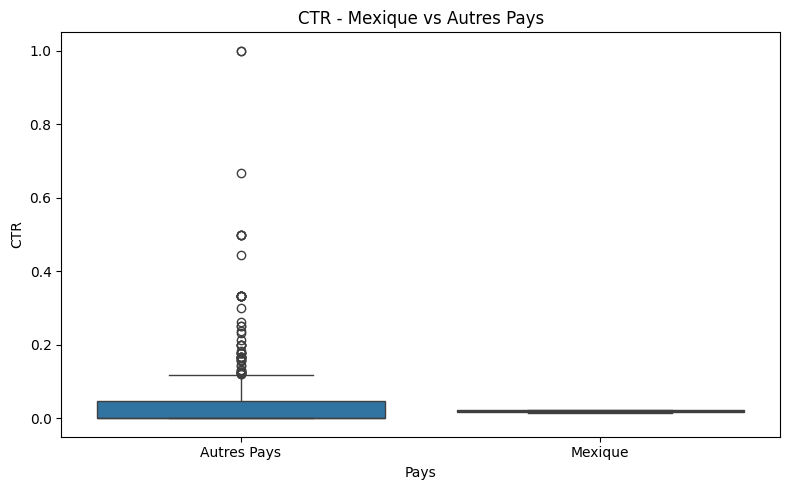

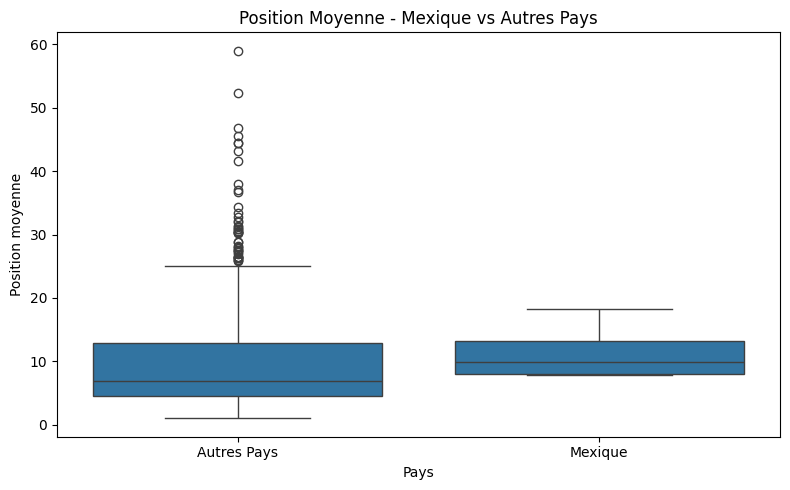

In [4]:
# 5. Focus sur le Mexique vs autres pays
mexique_df = pays_df[pays_df['Pays'] == 'Mexique']
autres_df = pays_df[pays_df['Pays'] != 'Mexique']

# Comparaison CTR
plt.figure(figsize=(8, 5))
sns.boxplot(data=pays_df, x=pays_df['Pays'] == 'Mexique', y='CTR')
plt.title("CTR - Mexique vs Autres Pays")
plt.xticks([0, 1], ['Autres Pays', 'Mexique'])
plt.ylabel("CTR")
plt.tight_layout()
plt.show()

# Comparaison Position
plt.figure(figsize=(8, 5))
sns.boxplot(data=pays_df, x=pays_df['Pays'] == 'Mexique', y='Position')
plt.title("Position Moyenne - Mexique vs Autres Pays")
plt.xticks([0, 1], ['Autres Pays', 'Mexique'])
plt.ylabel("Position moyenne")
plt.tight_layout()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_21144\1978719778.py:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  agg_df = pays_df.groupby("Continent").apply(
C:\Users\HP\AppData\Local\Temp\ipykernel_21144\1978719778.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Mexique', 'Autres LatAm'], y=[ctr_mexique_pond, ctr_autres_pond], ax=axes[0], palette='pastel')
C:\Users\HP\AppData\Local\Temp\ipykernel_21144\1978719778.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` va

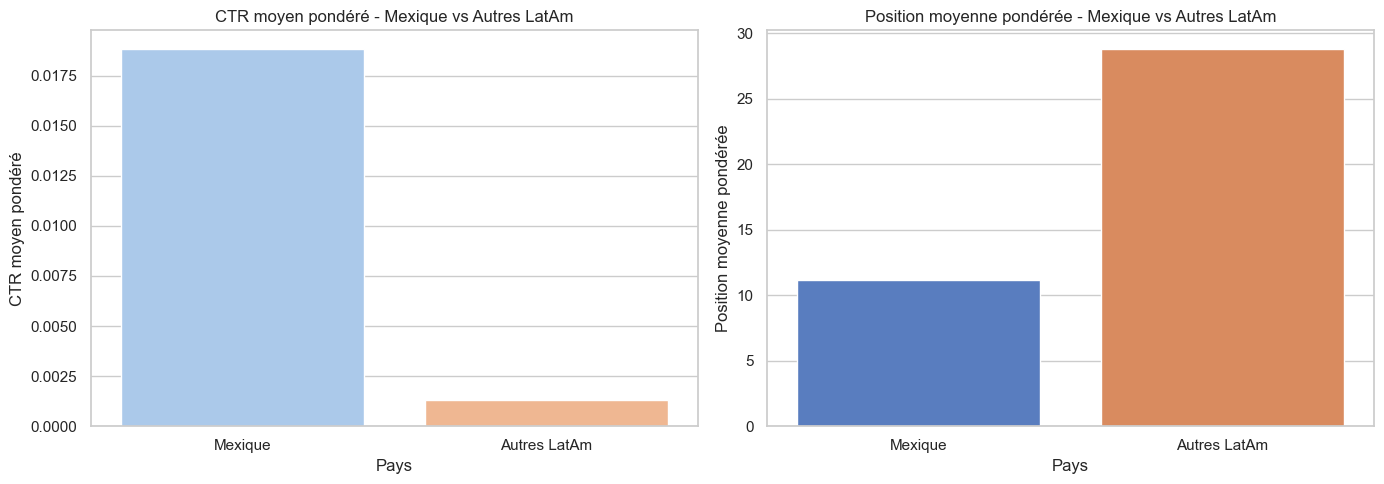

C:\Users\HP\AppData\Local\Temp\ipykernel_21144\1978719778.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=agg_df, x='Continent', y='CTR_moyen_pondere', ax=axes[0], palette='Set2')
C:\Users\HP\AppData\Local\Temp\ipykernel_21144\1978719778.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=agg_df, x='Continent', y='Position_moyenne_ponderee', ax=axes[1], palette='Set3')


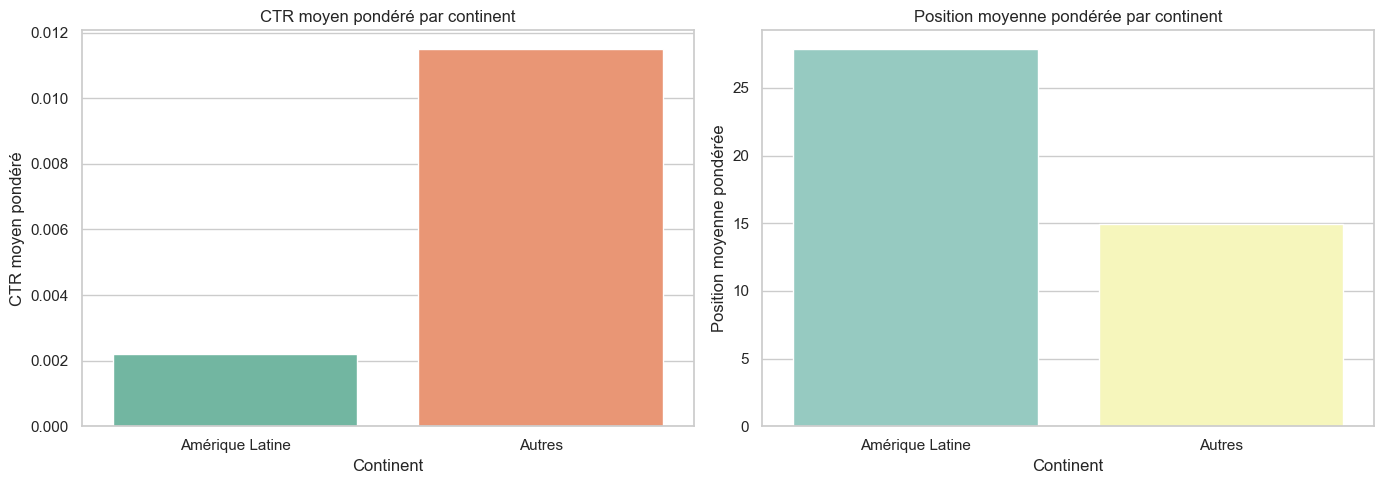

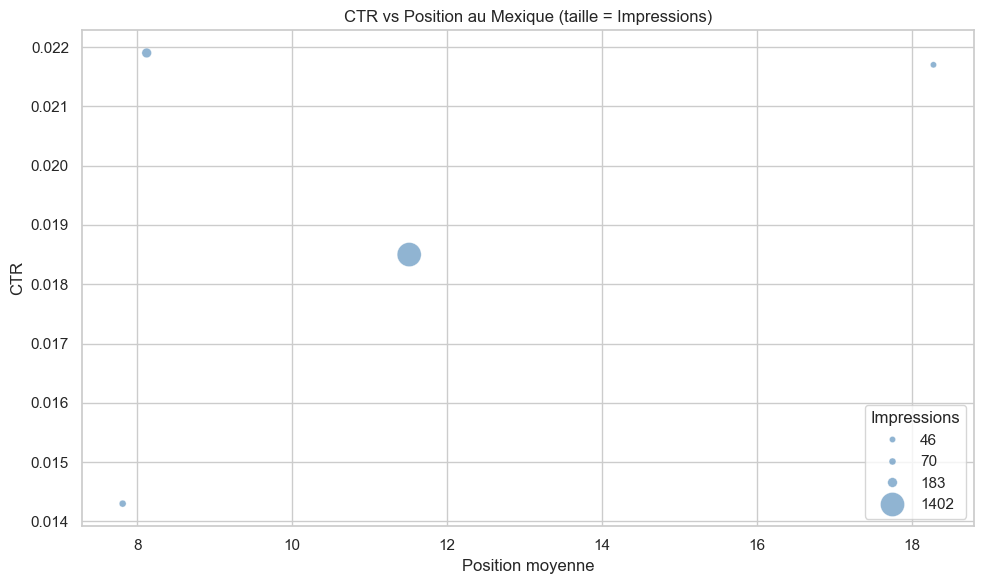

In [7]:
# Analyse du fichier pays_all.xlsx - Focus sur le Mexique et l'Amérique Latine

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Style graphique
sns.set_theme(style="whitegrid")

# Chargement des données
pays_df = pd.read_excel("../Clean_data/Pays_all.xlsx")

# Nettoyage
pays_df = pays_df[pays_df['Source'] != 'Global']

# Définir une colonne continent simplifiée
amerique_sud = ['Mexique', 'Brésil', 'Argentine', 'Chili', 'Colombie', 'Pérou', 'Équateur', 'Venezuela', 'Uruguay', 'Bolivie', 'Paraguay']

pays_df['Continent'] = pays_df['Pays'].apply(
    lambda x: 'Amérique Latine' if x in amerique_sud else 'Autres')

# Séparer les dataframes
latam_df = pays_df[pays_df['Continent'] == 'Amérique Latine']
reste_df = pays_df[pays_df['Continent'] == 'Autres']

# 4. Comparaison agrégée : Mexique vs Autres pays d'Amérique Latine (pondéré)
agg_df = pays_df.groupby("Continent").apply(
    lambda g: pd.Series({
        "Total_Clics": g["Clics"].sum(),
        "Total_Impressions": g["Impressions"].sum(),
        "CTR_moyen_pondere": g["Clics"].sum() / g["Impressions"].sum(),
        "Position_moyenne_ponderee": (g["Position"] * g["Impressions"]).sum() / g["Impressions"].sum()
    })
).reset_index()

# Agrégation Mexique vs autres pays d'Amérique Latine
mexique_perf = latam_df[latam_df['Pays'] == 'Mexique']
restelatam_perf = latam_df[latam_df['Pays'] != 'Mexique']

ctr_mexique_pond = mexique_perf['Clics'].sum() / mexique_perf['Impressions'].sum()
ctr_autres_pond = restelatam_perf['Clics'].sum() / restelatam_perf['Impressions'].sum()
pos_mexique_pond = (mexique_perf['Position'] * mexique_perf['Impressions']).sum() / mexique_perf['Impressions'].sum()
pos_autres_pond = (restelatam_perf['Position'] * restelatam_perf['Impressions']).sum() / restelatam_perf['Impressions'].sum()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.barplot(x=['Mexique', 'Autres LatAm'], y=[ctr_mexique_pond, ctr_autres_pond], ax=axes[0], palette='pastel')
axes[0].set_title("CTR moyen pondéré - Mexique vs Autres LatAm")
axes[0].set_ylabel("CTR moyen pondéré")
axes[0].set_xlabel("Pays")

sns.barplot(x=['Mexique', 'Autres LatAm'], y=[pos_mexique_pond, pos_autres_pond], ax=axes[1], palette='muted')
axes[1].set_title("Position moyenne pondérée - Mexique vs Autres LatAm")
axes[1].set_ylabel("Position moyenne pondérée")
axes[1].set_xlabel("Pays")

plt.tight_layout()

plt.savefig('../assets/pos_ctr_pondere_mexique.png', dpi=300, bbox_inches='tight')
plt.show()
# 5. Agrégation pondérée des performances par continent
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.barplot(data=agg_df, x='Continent', y='CTR_moyen_pondere', ax=axes[0], palette='Set2')
axes[0].set_title("CTR moyen pondéré par continent")
axes[0].set_ylabel("CTR moyen pondéré")
axes[0].set_xlabel("Continent")

sns.barplot(data=agg_df, x='Continent', y='Position_moyenne_ponderee', ax=axes[1], palette='Set3')
axes[1].set_title("Position moyenne pondérée par continent")
axes[1].set_ylabel("Position moyenne pondérée")
axes[1].set_xlabel("Continent")

plt.tight_layout()
plt.savefig('../assets/pos_ctr_pondere_continents.png', dpi=300, bbox_inches='tight')
plt.show()

# Filtrer uniquement les lignes pour le Mexique
mexique_perf = pays_df[pays_df['Pays'] == 'Mexique']

# Scatter plot CTR vs Position (taille = impressions)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=mexique_perf,
    x="Position",
    y="CTR",
    size="Impressions",
    sizes=(20, 300),
    alpha=0.6,
    color="steelblue"
)
plt.title("CTR vs Position au Mexique (taille = Impressions)")
plt.xlabel("Position moyenne")
plt.ylabel("CTR")
plt.tight_layout()

plt.savefig('../assets/pos_ctr_mexique.png', dpi=300, bbox_inches='tight')
plt.show()
